PostId: 2018-12-27-164449
Title:サイコロ本（Foundations of Statistical Natural Language Processing）、11章〜

ファイルサイズが大きすぎ、とgithub APIに怒られたので、ブログ記事を分割。

- サイコロ本を読む、トップへ
   - [サイコロ本を読む、1〜10章](https://karino2.github.io/2018/11/07/195900.html)

<iframe style="width:120px;height:240px;" marginwidth="0" marginheight="0" scrolling="no" frameborder="0" src="https://rcm-fe.amazon-adsystem.com/e/cm?ref=qf_sp_asin_til&t=karino203-22&m=amazon&o=9&p=8&l=as1&IS1=1&detail=1&asins=0262133601&bc1=ffffff&lt1=_top&fc1=333333&lc1=0066c0&bg1=ffffff&f=ifr"> </iframe>

# 11章 Probabilistic Context Free Grammars

文法の話。最初の所で用語やノーテーションがいろいろ出てくるので簡単にメモを取っておこう。

**dominate**

非終端のノード、$$N^j$$が、$${ { w_a} \cdot { w_b } }$$にrewriteされる時、$$N^j$$は$${ { w_a} \cdot { w_b } }$$をdominateしている、という。

また単語をあらわに書かずにdominateしている範囲（位置）だけを問題にする時は、$${ N^j}_{ a b }$$と書く。

### モデルの3つの仮定

1. 場所不変: どこをdominateしているかでrewriteの確率は変わらない
2. 文脈自由: サブツリーの確率は、ツリーの他の部分に依存しない
3. 先祖自由: サブツリーの確率は誰を親に持つかに依らない

### Chomsky Normal Formの仮定

文法は以下のどちらか

- 　$${ N^i} \rightarrow { { N^j} { N^k} }$$　
- 　$${ N^i} \rightarrow { w^j}$$　


## 11.3 文字列の確率

アウトサイドとインサイドの確率の再帰的な計算の話が出てくる。

インサイドは見たまんまだけどアウトサイドがややこしいので軽くメモしておく。

### アルファの定義

アウトサイドの確率、アルファは、以下のような形。

$${ \alpha_j({ p, q})} = { P({ { { w_{ 1 (p-1) }}, { { N ^j}_{ p q }}, { w_{ (q+1) m  }}}} \mid G)}$$

$$N^1$$から始めて$${ N ^j}_{ p q }$$が生成される確率、という事。

下付きの添字のjは、Nの上付きのインデックスを表す。
Nの上付きのインデックスは、1以外には特別な順番はなくて単に非終端記号のidに過ぎない。

### 11.3.3のメモ

帰納的にもっとも確率のたかい文法木のパースを得る方法の話だが、ぱっと見ものすごい計算量に見える。

Inductionのステップが凄い大変そう。
例えば一番上の分割を計算するためには、全分割での$$\delta_i({ p, q})$$が必要になる。

これってまたその先で、全分割での$$\delta_i({ p, q})$$が再帰的に必要になるので、上の方は凄い計算量だと思うんだよなぁ。これって全非終端記号の中から最大の奴を毎回探さないといけない訳で。
ボトムアップで簡単に出来ないと辛いよなぁ。

### 11.3のテーブルを手計算してみる

11.3.4のトレーニングのところで、式11.26のpreterminalのケースの式で、ベータがなんなのか良く分からなくなってきた。$$\beta_j({ p, q})$$という時は、wは所与の物を使うという前提では無いのか？すると$$\beta_j({ h, h})$$にPを掛けているのはなんなのだろう？

11.3.1まで戻ってテーブル11.3を自分で計算してみる事にする。

まずはfigure 11.1の二通りになる、という事を確認する必要があるかな。
どうしたらいいんだろう？下から始めてみるか。

まずpreterminalは一対一に対応している。

訂正: この記述は間違いで、sawはNPの可能性があるのを見落としていた。
ただsawがNPだとVがなくなるのでVPが作れず、Sには出来ない。

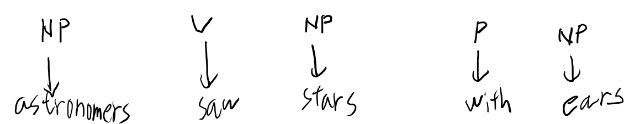

In [1]:
MeatPieImage()

次に、ルールのうち一通りしか無い物を見てみる。SからのNP VPがまず一通り。
次にPが含まれているルールはPPからP NPだけだが、Pの後ろは一つしかNPが無いのでこのルールを適用するしか無い。

Vを含むルールもVPのルールしか無いが、これはNPの側がどなるかはこの時点では決まらない。

という事でこの時点で即座に決まるのは以下か。

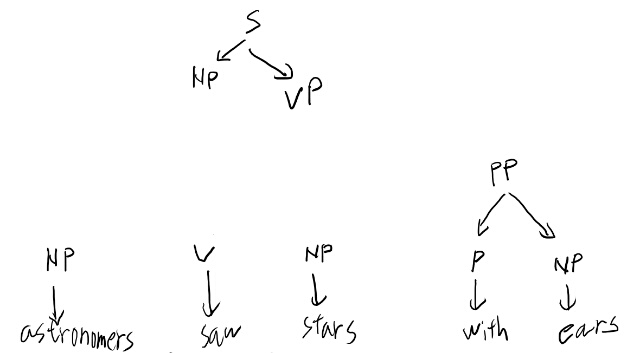

In [1]:
MeatPieImage()

VPが右に来るルールはSのところしか無いので、一番左のNPがSの左に来るのもこの時点で確定しているか。まぁいい。

で、Vの上のVPのところのNPをどうするか、というのは二通り考えられる。
まず隣のNPがVPを作る場合。

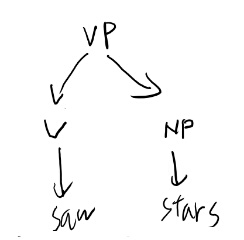

In [1]:
MeatPieImage()

もう一つの場合は隣のNPはそのさらに隣のPPと先にNPを作る場合。

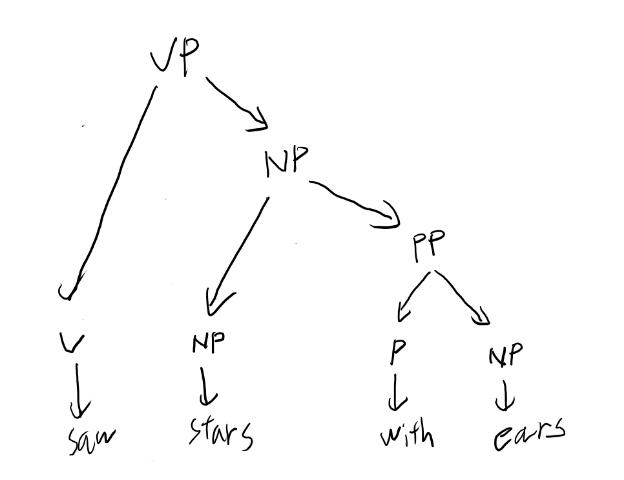

In [1]:
MeatPieImage()

ここを決めれば残りはどちらも一通りしか無くて、ツリーが決まる。これがFig 11.1の2つのツリーになる。

ここまでを考えてみると、隣同士のどれを取るか、の組み合わせ分だけツリーを考えるのがシンプルそう。
だが行き止まりになってる事もあって、その場合はそのツリーのそこから上の確率はゼロになる。これは$$\alpha_j({ p, q})$$がゼロになる、という事か。
$$\alpha_j({ p, q})$$を理解した。

さて、元の良く分からなかった11.26式を改めて見てみる。
$$\beta_j({ p, q})$$のwは所与じゃないのか？という話はやはり所与に見える。
この唐突に出てくる$$w^k$$は特定の単語を表すidだな。
つまりある単語が$$N^j$$で生成されるか、という話か。

$$P({ w_h} = { w^k})$$というのは観測結果の物だけ残す、と言ってる訳だな。
うーむ、なんかぼやっとするな。
もう少しベータの手計算を続けるか。

Table 11.3を作るにあたり、まずテーブルを書いてみよう。

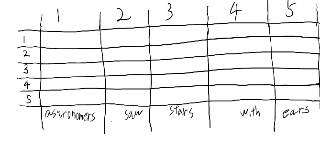

In [1]:
MeatPieImage()

このテーブルは、縦がpを、横がqを表しているんだな。
pからqまで、という順番なので、対角成分より上だけ埋まる。

対角成分はpreterminalからterminalの生成なのですぐ埋まるな。埋めてみよう。

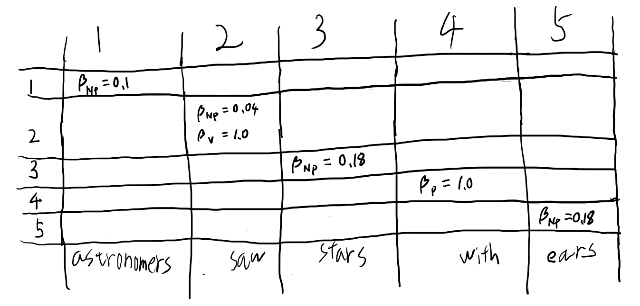

In [1]:
MeatPieImage()

$$\beta_V$$が1というのはどういう意味だろう？
Vというルールから何が生成されるのか、という事を表から見ると、sawだけだ。だから1なのか。

あるルールから何が生成されうるか、という選択肢は、全部確率を足すと1になるのだな。
ちょっと分かってきた気がする。

つまり$$\beta_j({ p, p})$$というのは、$$N^j$$から位置pにある単語が生成される確率だな。

さて、この表をさらに埋める事を考えてみよう。
例えば1, 4が空欄になってるので、どうして空欄になるかを埋めようとしてみる事で考える。

まず1から4までをなにかのルールから生成されてる、と考える。
すると最終的にはそれはpreterminalから生成されるはずなので、

- 1, 1
- 2, 2
- 3, 3
- 4, 4

は含んでいる。
さらにこのルールはチョムスキーの標準形なので、preterminal以外のルールは2つの非終端記号から出来る。

1, 4を埋めるためには、

- 1,3と4, 4
- 1, 2と3, 4
- 1, 1,と2, 4

のどれかである必要があるか。


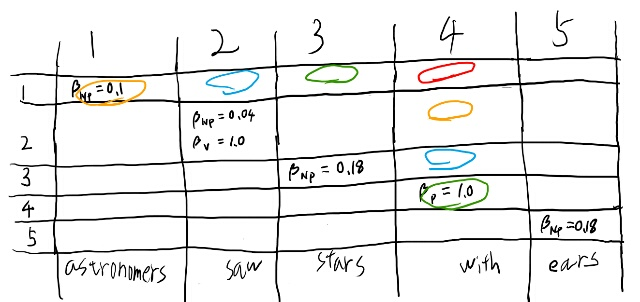

In [1]:
MeatPieImage()

つまり赤を埋めるには、対応する色のどれかの組が必要。
なるほど、目的のセルを、row側とcol側に見ていったそれぞれが要るんだな。

例えばPが右に来るルールは無いから、幾つかのセルは確率がゼロなのが分かる。
それをバツで消してみる。
ついでにPPからPのセルも埋めてみる。

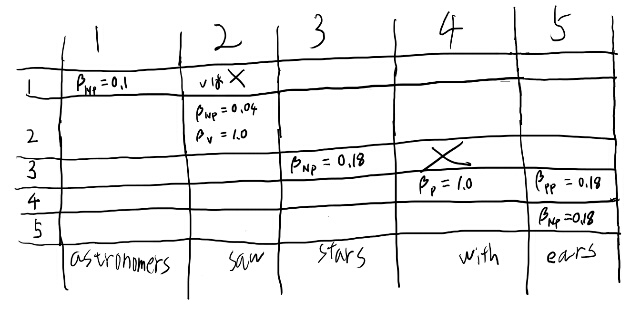

In [1]:
MeatPieImage()

一番右上のセルに注目しよう。
これは必ずNP VPなのだが、という事は下のどこかはVPじゃないと駄目、という事だよな。
で、左はNPだ。

VPのセルというのは左にVが必要。
そう考えると、一番右の列の、3から下はVPになりえない。
2がVPなのは決まるな。
すると1, 1と2, 5のセルを使うのは確定するのか。
そして2, 5のセルはVPなんだな。

では$$\beta_VP({ 2, 5})$$をどうやって求めるか考えてみよう。
ここを埋める方法は、

- 2, 2と3, 5
- 2, 3と4, 5
- 2, 4と5, 5

の3通りがある。これは2, 5と言った瞬間に機械的に決まるな。
一番上は3, 5が必要。
3, 5は二通りか。3,3と4, 5か、または3, 4と5, 5。
そして3, 4は無いから3, 3と4, 5か。

これはNPからNPとPPが出来るルールだな。

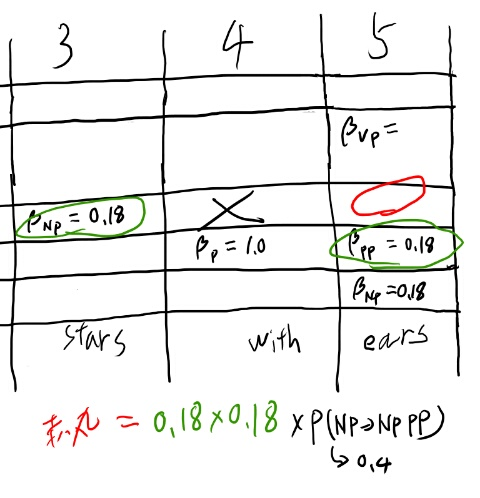

In [1]:
MeatPieImage()

2, 5に戻って2, 4と5, 5のケースを考えてたら、2, 4ってありえない気がしてきた。

まず3, 4がありえない。すると、2, 4というのは2, 3と4, 4になるが、4, 4はPなのでPが右側に出るルールが必要で、それは無い。

そうすると1, 4も無いんじゃないか？
1, 4は2, 4と3, 4が無いので、1, 3と 4, 4しか残らない。そしてこれも右側にPが出るルールが無いと駄目。という事はこのバツは上全部うめられるのか。

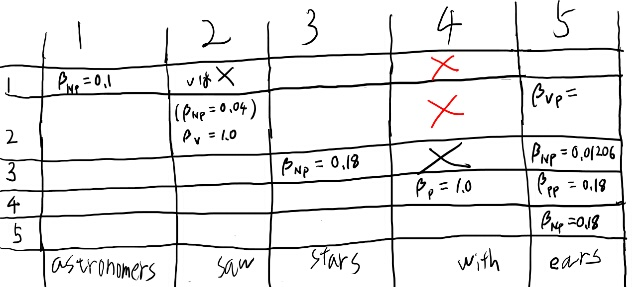

In [1]:
MeatPieImage()

あとは2, 3を埋めて2, 3のケースでの2, 5も求めれば2, 5は計算出来るな。
これは確かに帰納的になっている。

### 11.3.4のトレーニングの問題に戻る

さて、理解が進んだところで式11.26に戻ってみよう。
左辺で求めようとしているのは特定のpreterminalからある単語が生成される確率だ。

右辺の1つ目の式を見てみよう。
分子はh番目が$$N^j$$でdominateされる確率と、そのh番目をdominateする非終端記号から単語が生成される確率とその単語が目的の単語の同時確率となってる。
この同時確率は分かりにくいな。

$$P({ N^j} \rightarrow { w^k})$$と、$$P({ { { N^j} \rightarrow { w_h}}, { { w_h} = { w^k}}})$$の違いを考えよう。

前者は$$N^j$$から特定の単語が生成される確率だな。
これは何番目、とか関係なく、どこでもいいからこのルールが成立する確率。

後者は難しいな。アルファも掛けた式全体で、h番目の単語が$$N^j$$から生成れる確率と、そのh番目が単語$$w^k$$と一致する確率の積としいう意味だろう。

つまりアルファも掛けた分子全体で、h番目の単語が$$w^k$$で、それが$$N_j$$から生成される確率だ。

アルファを除くと、h番目のpreterminalが$$N_j$$だった時に、h番目の単語が$$w^k$$となる確率か。

それはようするに

- h番目が単語$$w^k$$なら$$P({ N^j} \rightarrow { w^k})$$
- h番目がそれ以外の単語なら0

となる何かか。わかった。つまりデルタ関数をかけた物だな。

では次の11.27を見てみよう。

分母は$$N^j$$が今対象としているセンテンスのどこかに現れる確率。

分子のシグマの中はh番目の単語が$$N^j$$から生成されて、それが$$w^k$$となる確率。

という事で11.27全体では、文章の中のどこかの$$N^j$$が、$$w^k$$を生成する確率、という意味になり、それが左辺の表すところであろう。（厳密には文がgivenの時の値であり、それが左辺の最尤推定値となっている、という事だろう）。

よし、分かった。

### 11.3.4のトレーニングのあらすじを考える

式11.26やそれに付随する式を理解出来たので、全体のあらすじを考えよう。

前項で、非終端記号と終端記号の生成確率がわかればパースが出来るようになった。

この項はデータからこれらの生成確率を学習したい、という話。
ただトレーニングデータに文法ラベルは無い。

そこで

1. まず文法の適当な遷移確率を所与としてパースを行う
2. 行われたパースの結果をカウントする事で遷移確率の更新を行う

を繰り返す事で学習を行っていこう、と考えているようだ。

パースは確率的になる、という理解。

で、それらを元に11.3.2でやった帰納的な計算方法で、アルファとベータが計算出来る。

このアルファとベータを使えば、11.26式のように生成確率の期待値を求める事が出来る。

ここでもととなってる11.25式を見ると、右辺では古い生成確率が使われている。
これらの古いパラメータを使って構造を決めて、その構造からパラメータを推計している。

もう少し右辺を見ると、分子は以下の3つの確率の積となってる。

1. $$N^j$$が$$N^r$$と$$N^s$$になる、というルールの確率
2. $$N^j$$自身が発生する確率
3. $$N^r$$と$$N^s$$で実際の単語列を説明出来る確率

つまり1のルールで文章が説明される寄与度みたいなのが求まってるのだろうな。
これは$$N^j$$が発生する確率も含んでるので、割る事で生成確率の期待値を得る事が出来る。

## 11章、なかなか難しかった！

やっと読み終わった！
なんか記号が何を意味するかとか理解するのに苦戦して、結構読むのたいへんだった。
一応理解出来た気がしているが、本当にちゃんと理解出来てるかは少し自信無い。

それにしても頑張って理解したあとの、最後のPCFGのInside-Outsideアルゴリズムの問題点は「つまりそれは全然駄目なんじゃないか？」という気がして辛い。

ただアイデアとしては面白いので、ちゃんと計算追っておいたら何かの役に立つ事もあるかもしれないな、という気分にはなれた。

# 12章 Probabilistic Parsing

確率的なパースの話。

12章は大きく12.1と12.2に分けられて、12.1はパース全般についての概念とかの話。12.2は具体的なパースのシステムを見ていく、という構成らしい。

まずは12.1から見ていこう。

### 12.1.1から12.1.3までの概要

ふんふん、と読んでいったら、何の話をしているのか分からなくなったので立ち止まってメモを書く。

12.1.1ではパースのdisambiguationにprobabilisticな要素を入れる、モチベーションなどを解説している。

12.1.2は教師データの話で、treebankと呼ぶらしく、有名なのはPenn Treebankという事、その実際の中身を見てみる、という話。

で、12.1.3はどいう風に確率を定義するか、という話をしている。
ここは良く分からなくなった所なので、少し詳しく。

まずセンテンスをgivenとしてツリーの確率をモデリングするのは、やってる人は居るがちょっとおかしい、と言っている。

で、treeからセンテンスが一意に作られるとすると、ツリーでセンテンスを表す事が出来るので、ツリーとセンテンスの同時確率が、センテンスになるツリーの確率に落ちる。

その後、この確率が分かれば、あるセンテンスに対応する全ツリーの確率を足し合わせるとセンテンスの確率が得られる、という話をしている。

そこから言語モデルがあればパースのツリーから何がもっとも適切なパースかを選べる、という話がある（が良く分からない、後で考えてみる）

### 12.1.3の、何故センテンスをgivenとモデリングしないか？

さきほどのメモで、センテンスをgivenとした確率というのはちょっと普通じゃない（a  little odd）、みたいな話をしてたが良く分からないので考えてみる。

まずパースの直接的な表現としてはむしろそっちの方が普通だ。だからわざわざ言及しているのだろう。

で、oddだと言ってる理由は、確率のgivenの方に特定のセンテンスが入る、というのが、普通のセッティングと違うからだ、と言っている。

個々のセンテンスごとに確率を定義するのではなく、もっとある種の共通の属性をもったセンテンスのグループに対して確率を定義したい、といっている。

いまいち良く分からない。

なおここで、言語モデル、という物の定義がさらっと出てくるが、これがちょっと普通と違うので注意が必要。

12.1.3では言語モデルとは「個々のツリーの確率」という事になる。
センテンスの確率じゃない。

で、この言語モデルを使う方が普通だと言ってる。これのどのへんが「more general class of data」なんだろう？
全然分からん。

### 言語モデルとパースの話

言語モデルをツリーの確率という所に気づけば、あとの議論は割とストレート。

ツリーの確率が分かればセンテンスの確率が分かる事、ツリーの確率が分かれば、センテンスがgivenなツリーの確率はセンテンスを産む全ツリーの中で一番大きい確率のツリーを選ぶだけな事、などが書いてある。

ツリーの候補を列挙する方法は？という気はするが。

なお、言語モデルがあればツリーをunambiguate出来るが、その逆は正しくないとの事。
ツリーがパース出来ても、ツリーの確率が分からない、という場合はあるとか。

ただツリーの確率をモデリングした方がパースの精度は上がる事が多いとも言っている。へー。

### 12.2の後半が辛い

ずーっと論文紹介みたいな感じで、いろいろなアイデアをちょろっと紹介する、がダラダラ続いて、読んでて辛い。

この説明だけでは詳細はどうせ分からないし、その割にはそれが延々と続く。
しかもどれもアドホックな部分が多くて、2019年に学ぶ物じゃないよなぁ、という印象が強い。

## 12章は後半はいまいちだった

12章はProbabilisticなパースの章で、前半で手法に依存しない一般的な話を、後半で具体的な手法を見るという話だったのだが、後半は単なる紹介みたいなのでいまいちだった。

前半はなかなか勉強になった。

# 13 text、wordのalignmentと翻訳

# 13.1 textのalignment

翻訳のペアで、どのテキストが対応してるか、単語が対応してるかを探す、という問題。

### 13.1の良く分からない所をメモしておく

13.1の後半は単なる論文のabstract紹介みたいになってて、良く分からない。
ただ元論文読もうという程の興味も惹かれないので、分からない所をメモして先に進む事に。

13.1.2のGale and Church、sの求め方がいまいち分からない。パラグラフの長さの差の二乗を使ってる、とあるが、具体的にはどういう式かね？
普通は平均との差の二乗和だと思うが、ミューを使うのかしら？

13.1.3のオフセットアラインメント。図13.4の意味が分からない。

2つのテキストをつなげる、とあるが、短文同士を一つだけつなげてグラフを描く、という事か？
何故それで黒い四角の所が一様っぽくなるのだろう？

4gramの一致を見るなら対角線は左上から右下じゃなくて左下から右上になりそうだが。
例えばxが5と完全に一致するのはyが5の時に思えるが、何故逆なのだろう？

text alignmentの情報としては明るい象限の方が大切だ、と言ってるが、何故だろう？明るい象限は自身のテキストとのマッチングだから無価値なのでは？

2つのよりかすかな対角線が二本ある、というがどこの事だろう？そんなの見えないが。

Fung and McKeownの方法。
arival vectorとして262, 4, 252と書いてあるが、この意味が分からない。
大きさでソートされてないがこの順番にはどういう意味が？

## 13.1は良く分からないのが多かった

全体的にアブスト程度の説明でこれじゃ分からんな、という手法の列挙だった。
コアとなるアイデアくらい知っとこうと読んだが、分かった気はしなかった。

ただテキストアラインメントという問題自体があんま興味が湧かないのでまぁいっか。
現代的にはななめ読みで飛ばしてしまう方が良い気がする（なんとなく惰性で全部読んだが）

## 13.3 machine translationの話もいまいち

英語からフランス語を翻訳して、そのフランス語がもっとも出てきそうな英語を推測する、という話をしている。

戻した英語でロスを作る、という話では無い模様。

translation modelは単語同士の条件付き確率だけを元に、それの積を全アラインメントについて足し合わせる、みたいなモデル。（13.5）

これじゃ全然駄目じゃん、という気はするが、そういう時代なのだろう。

で、単語の条件付き確率はEM法で対訳文から求める。

具体的に書ける程は理解出来てないが、いかにも駄目そうなので軽くなめた程度で次に進んでしまって良い気がする。
2000年の時点では応用は遠いねぇ。

## 13はいまいちだった

読み終わったので感想とか。
あまり具体的な話がなくて、論文が列挙されてるだけの所が多い。
具体的な話がある所もあまり詳しくなくてちゃんとは理解出来なかった。

翻訳周りの具体的な話がいっぱい出てくるのを期待して読んだのだが、そういう章ではなかった。13章以降は実際の応用のパートという事になってるので、ここから先はこの程度の話しか無いのかも。

次以降もこんな感じならさらっと斜め読みして終わらせてしまおう。

ただ、ここまでやってきた事との対応みたいなのは眺める価値はあった。
ここで挙げられてる事も、該当論文読んでやれば出来そうだな、という気にはなったし、ここまでやってきた事の位置づけは分かる。

それにしても2000年の時点では翻訳は全然ダメそうだな。
単に単語置き換えるだけのシステムの方がマシなんじゃないか？と思えるほど。
ただ凝った事をやろうとして、かえっていまいちになる、という事を繰り返してマシな物に近づいていったのだろうとは思うので、そうした軌跡の記録にはなっている。

ただこの時代なら自分は自然言語処理はやらないなぁ。

# 14章 クラスタリング

途中まで読んでみたが、なんかNLPと関係ない普通のクラスタリングの話が多くて、そこはあまり読む意義が無さそう。

軽く要点だけおさえて先に行きたいな。

14.1がhierarchical clusteringで、14.2がflatなclusteringとか。

## 14.1 hierarchical clustering

bottom-upとtop-downのアルゴリズムがある。

bottom-upはagglomerative clusteringとも言うらしい。agglomerativeはくっつくとかそんな感じのニュアンスの模様。
bottom-up全体をそう呼ぶのか、具体例として挙げたFig.14.2のアルゴリズムをそう呼ぶかは分からんが、わりとどうでも良かろう。

bottom-upの例であるFig.14.2は、最初は全部にばらばらのクラスタを割り当てて、一番近い2つをまとめる、を繰り返すっぽい。

Fig.14.3はtop-downの例。
全部入ったクラスタから始めて、もっともcoherentで無いクラスタを分割する、を繰り返す。
coherentの具体例はここでは述べてない。

### 14.1.1 single-linkとcomplete-link

simにはsingle-linkとcomplete-linkとgroup-averageの3つがある、とか言ってる。
へー、初耳。

これはクラスタ同士のsimilarityみたいだね。
以前そのネタで論文を書いた事がある身としては興味深い。結構頑張って調べたがあんまこの手の議論は無いのだよなぁ。

single-linkは2つのクラスタのうち、一番近い要素同士のsimを使うっぽい。
completeは一番遠い物同士。

### 14.1.2 Group-avarage agglomerative clustering

重心同士の類似度をクラスタの類似度とする、という話。
重心の更新が高速に出来るから良い、という話。

別段どうという事は無いな。
そのほか言語モデルを改善するのに使う話（ただし改善幅は微妙…）とか、
top-downはあんま使われないが良い場合もある、とかいろいろ話はしてるが、どれもそんな難しい事は無い（というか問題が難しすぎて大した事は出来ない、というか）

## 14.2 Non-hierarchicalなクラスタリング

大した話は無いが、MDL（Maximum Description Length）という指標でクラスタ数を決める、というのは面白いな。

## 14章、流し読みする分には悪くなかった

ちゃんと理解しよう、とか考えずにサラサラ読んで、ぱっと見て分からない事は素直にあきらめて進むと、14章はなかなか悪くなかった。

EM法の解説は読み物レベルではわかりやすかったし、昔真面目にやった事をそれなりに思い出せて定着度が増した気がする。

その他いにしえのクラスタリング関連の参考文献とか多くて、必要になった時に資料として価値もありそう。

パート4はこの位の気持ちで読むのが良さそうね。サラサラ読んで先に進もう！

# 15章 Information Retrieval

この章も流し読みで行こう。
ただ最近勉強会でやってるトピックはこれなので、知りたい所ではある。

### 15.1.2 Evaluation measure

15.1.2のEvaluation measureは重要そうなので少し真面目に読む。

uninterpolated average precisionとinterpolated average precisionの2つが紹介されてる。
uninterpolatedは普通の平均。

interpolatedは、まずターゲットとするrecallの値を選び、それを実現出来るところまでランキングを下げていく。
その後最初のランキングから、precisionが上がる間（つまり正解が続く間）はランキングを下げた、最後の所のprecisionが定義らしい。

15.2はtf-idfの詳しい解説。
全部覚えるような話では無いと思うが、何かあった時にこのページ開こう、と思わせる資料的価値は感じた。

ノーテーション。$$cf_i$$はcollection frequencyで、単語$$w_i$$がどれだけ対象となるコーパス全体で出てきたか、という数。

15.3はポワソン分布の話。
復習としてちょうど良さそうなのでここは真面目にやるかなぁ。

我らのケースでは、ある単語$$w_i$$が一つのドキュメントにk回現れる確率、としてポワソン分布を使う。

パラメータは平均なので、一つのドキュメントにその単語が平均何回出てくるか、となる。つまり以下。

$${ \lambda_i} = \frac{ cf_i}{N}$$

### RIDFの計算

15.3.5で、insuranceとtryのRIDFを計算してみよう、と書いてあるのでしてみる。

Nは79291で、テーブル15.4は以下。

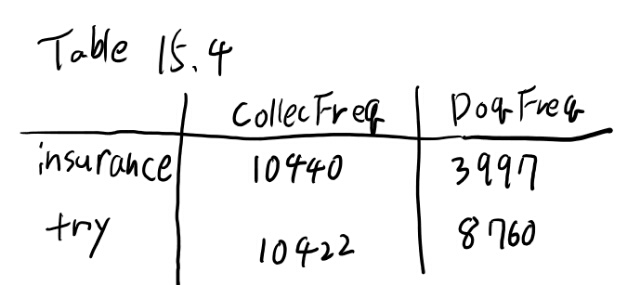

In [1]:
MeatPieImage()

RIDFの定義などは以下。

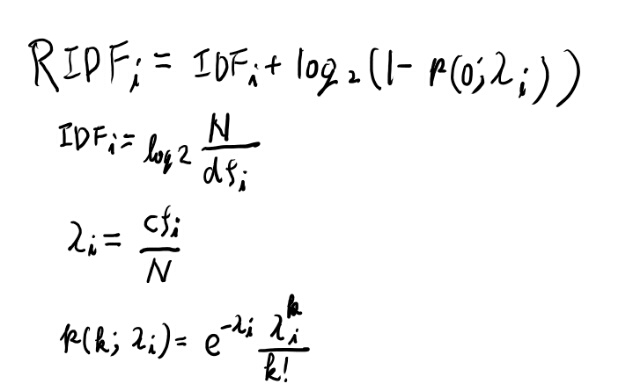

In [1]:
MeatPieImage()

まずはinsuranceから見てみよう。
ひたすら必要な物を計算していく。

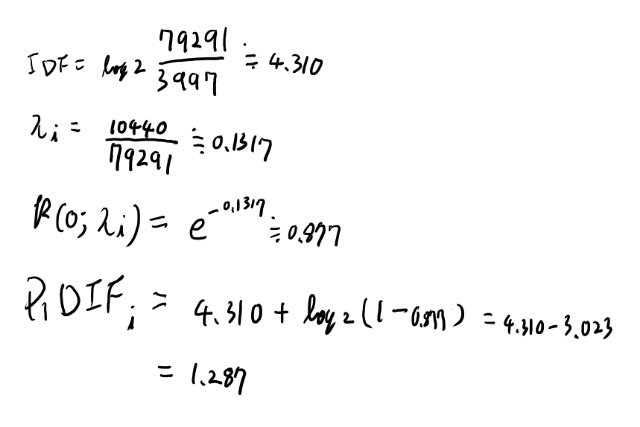

In [1]:
MeatPieImage()

あってそう。
やれば出来そうなのでtryの方はいいか。

### 15.4以降

Latent semantic indexはSVDとかの話。
さすがにもうこれは読まなくていいだろう。

15.5のdiscourse segmentationはトピックこどに文章のブロックを分割する、という話。
TextTilingという手法が紹介されてて、まぁ普通にアドホックに考えてもこんな感じでやりそう、という内容。
一応目は通しておく。

## 15章はあまり知らない事は無かった

もともとこの辺はやってた事もあるので知らない事は少なかった。
たださらっと読むには悪くない。
目を通すくらいで先に進むのが良いね。

# 16章 Text Categorization

開幕から教師ありclassificationの定義とかの説明から始まる。
節タイトルを見てもDecision Tree、Perceptrons、k-Nearest Neighborと馴染み深い物ばかりなので、あまり読む必要も無さそう。
流し読みだけしておく。

### micro averaging

複数のカテゴリへのclassificationでの評価指標で、micro averagingとmacro averagingというのが紹介されてる。知らなかったのでメモ。

複数のカテゴリが存在する場合のclassifiationの話、とある。どれか一つに属すのかマルチラベルなのかは記述からは曖昧。

各カテゴリについて、そのカテゴリかそうでないかのcontingency tableが描ける。
これをどう平均して一つの指標とするか、という話。

macro averagingは表ごとにaccuracyとかを出して、それらの値を平均する、という物。

micro averagingは全カテゴリのcontingency tableの各セルを足し合わせて、一つのテーブルを作り、それのaccuracyとかを求める、と書いてある。

セルを足し合わせる、という事の意味は分かりにくいが、たぶんtrue positive の数とかを全部足す、という事じゃないか。 

macroの方は各カテゴリを等しい重みで扱う、と言ってる。それは分かる。
microは各オブジェクトの重みを等しく扱う、と言ってる。それはどういう意味か？

2つのカテゴリ、c1とc2について考えよう。
この両者で大きく違いが出るのは、
c1とc2に属すオブジェクトの数が凄い違う時だよな。

1000個あって、c1が2、c2が998個あったとする。

例えばrecallを平均する時、c1が2つ当てられて、c2が100個当ててると、macroではリコールは50%くらい、microでは10%くらいになる。

macroはc1とc2に同じ重みを与えてる。
microでは個数が全てなので、c1であるかc2であるか、には違いが無い。
これが個々のオブジェクトに同じ重みを与えてる、という事か。
c1のオブジェクトもc2のオブジェクトも同じ重みで扱う。

## 16.2 Maximum entropy modeling

目次のバグっぽい理由で最初は気づかなかったが、16.2にMaximum entropy modelingという、自分の良く知らない事についての節があった。
良く知らないので真面目に読んで見よう。

まずフィーチャーの定義から。
フィーチャー$$f_i({ { x_j}, c})$$は、単語iがドキュメントに入ってて、ラベルが1なら1。そうでなければ0。

つまりドキュメントjのラベルが0なら、
$$f_i({ { x_j}, c})$$は全部ゼロか。

イメージ的にはtermベクトルでドキュメメントを現した時、ドキュメント群は行列となるが、そのうちラベルがtrueの行だけ残して、0-1に振り直した感じか。（ちょっとでも値が入ってたら1）

fは添字はiしか持ってなくて、jはxの方が持ってる。
$$f_i$$は気分的にはラベルを予想する何かだよなぁ。
ただラベルがちょっと特殊で、単語iとの積になってる。
つまりドキュメントから単語iへの射影と、ラベルのシグモイド関数の積みたいな感じか。（追記:この解釈は間違ってる。後述の式16.4周りの話参照）

ただちょっとややこしいのは、ラベルが引数に入ってるんだよな。
もちろんラベルが分かってれば、単語iへの射影とラベルの積で良い訳だが。

16.4式ではラベルとxの同時確率をモデリングしてる。
cが1の時と0の時で分けて考えてみよう。

cが1の時。右辺というのは、その単語が現れる確率、、、というか観測を所与とすると尤度になってる。
単純にはその単語が含まれてたらラベルが1になりやすい、みたいな事を拾ってるんだろう。

なんか不思議な感じだな。
普通はfにxを入れてcを予測する関数を推計する訳だが、これは違う。
観測の値からfの値が計算出来て、それを集計する事で同時分布を推計してる。
fは推計しない。なるほど。

これはどんなモデルだろうか？logを取ってみる方が良いか？

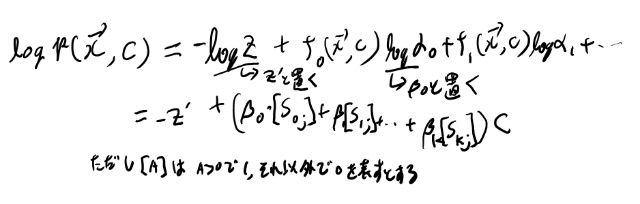

In [1]:
MeatPieImage()

（追記:ここのベータは単に置いただけであとで出てくるTable 16.6のベータとは無関係）

ドキュメントのインデックスとしてjが出てきてしまった。なんかおかしいな。

xベクトルに対応して各$$s_i$$は出せるはずだよな。
これに大かっこをつけた物は、単語があるか無いかを表している。
回数を無視したBoWみたいなもんか。（多分正式な呼び名はありそうだがどうでもいい）

で、これの線形回帰になってて、中身が正ならcは1と、負なら0と予測している訳か。
なんか表記はややこしいがしょぼいモデルだな。

で、この重みを学習するのか？

### 16.2.1 Generalized iterative scaling

重みをただ学習する、という話には行かず、なんかfの値の期待値がempricalな期待値と一致するような同時分布pを探そう、という話になってる。

各fはxごとに異なる値をとる訳だが、これらのxやcでの和を取れば期待値は出る…といっても、こんなsparseな期待値でまともな物が出るのか？と思うと、これは単語の順番を持ってなくて、それぞれの寄与は線型だから大したこと無いか。

いまいち何をやってるかピンと来ないな。
単純に重みを最尤推定するのとどう違うのだろう？

重みを最尤推定するなら、単純にその単語が出てきた総数で、単語が出てきてtrueだった個数を割るのか？
いや、たぶん違うな。
イメージとしてはsの大かっこで空間上にプロットして、その分離平面を探す事になるのか。

うーん、log linearなモデルでこれより良い物が作れる気は全然しないんだが、なんでこんなヘンテコな最適化をするのだろう？モチベーションが分からんなぁ。

まずは書いてある事を読んでみよう。

16.10まで読んでいくと、xがgivenのcの確率が出てくる。
これはシグモイド、と自分が呼んでた物とほとんど同じだよな。
この確率が出ればclassificationは終わってる気がするんだが、なぜ同時分布を出すのだろう？

アルゴリズムとしてはEM法に似てて、

1. 重みのパラメータを決める
2. 同時分布を出す
3. 各単語について、それが起こってcが1となる個数を、その単語の発生ドキュメント数で割る
4. 2を使って式16.10で同様の期待値を出す
5. 3と4の比を使って、近づくようにパラメータをアップデート

となってる。なお、4でしれっと16.10を使う、と言ってるが、xがgivenのcの確率はここまで出てきて無い。
同時分布が出てきてるのだからxの確率で割れば良い気はするが、ほとんどが1/Zだよなぁ、これ。
この推計値にどれくらい意味があるんだろう？

フィーチャーを相当絞って、同じxが複数出てこないと駄目だよなぁ。
なんか全然駄目なモデルに思えるんだが、これをやるモチベーションってなんなのだろう？

### Exersice 16.7 classification decisionを求めよ

お、さっき言ってた、出し方が出てないという分布がExercise 16.7で具体例について出せ、と言ってるな。出してみよう。

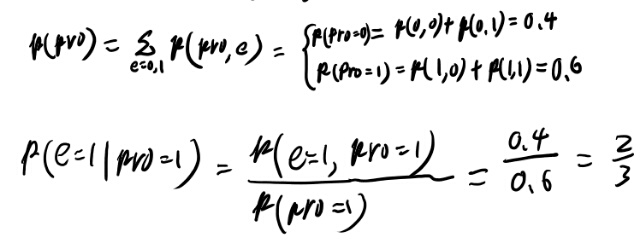

In [1]:
MeatPieImage()

うーむ、合ってる気がするが、やはり同じxのドキュメントがそれなりな数が無いと期待値は定義出来てない気がする。
単語ならいざしらず、単語の組が一致するなんて無いだろう、と思うのだが。

### 16.2.2 実例への応用

C=20で、9603で試してる、と言ってる。
少しどのくらいこのデータ数で意味があるか考えてみよう。

C=20という事は、各単語が0-1だから、2の20乗、つまり2048通りの組み合わせがある訳だ。
9603ドキュメントあるのだから、ざっくり4倍くらいのドキュメントがある。

だがこの中からtrueがどれくらいあるかも考える必要がある。
Table 16.9を見ると、earningsは1/3くらいっぽい。

すると、3000ドキュメントくらいはラベルがtrueとなる。
2048の組み合わせのうち、どのくらいこの3000ドキュメントでモデリング出来るだろうか？

ちゃんと正規分布とか仮定すれば計算出来そうだが、感覚的に考えて終わりとする。
感覚的には良く出る組み合わせは2個とか出てくるのは期待出来そう。
3個くらい出るのも期待は出来る。4個はほとんど出ないかなぁ。

何かの期待値を計算する、となると心もとないな。だいたい0か1か2か3で、ほとんど0か1か2に集中する。
これでxのpriorが1/Zか2/Zか3/Zで大きく推計結果が変わると言われてもなぁ。

逆に、trueのラベルが2万くらい、つまり全体で6万ドキュメントくらいあればそれっぽい分布は推計出来そう。
もちろんtermがあるか無いかの単純な0, 1で、しかも20単語しかみないという相当限定的な状況でこれなので、vocabを5000くらいみたいね、と言った瞬間不可能になる訳だが。

### 最後の批判が思ってた事をいろいろ書いてある

最後の所で、線形回帰と予言力は大差ない、という批判が出てる。
だがフィーチャー同士の関係も見てる（takes dependence between features into account）、という所がセールスポイントらしいが。

あれ？ほんと？16.12ではi以外を見てないように見えるが…

フィーチャーをdupしたら自動的に重みが半分になる、と言ってるが、それはなりそうだな。
相関は見てないが、他との重みは見てる気がする。
確かにナイーブベイズではフィーチャーごとの条件付き確率をばらばらに推計して、単純に積を取ってしまうのでフィーチャーをdupするとそのフィーチャーの効果が倍増されてしまうね。

スムージング無いと駄目じゃね？というのも書いてある。だよねぇ。

そんな中で強みの説明もある。
フィーチャーにもっと変なのを含めても、empricalな期待値に従って勝手によきに計らってくれる、という事が書いてある。
別にスケーリングしだ決定木でよくね？という気がしてならないが、確率モデルがわかりやすい、というのは良い事もあるかもなぁ。

### どの辺がmaximum entropyなのだろう？

そういえばentropyがあんま表に出てこなかった気がする。
各フィーチャーに対して一番情報を残すように分布を推計してるように見えるから、たぶんentropyも最大になるように推計していると解釈出来そうだけど。

うーん、これはちゃんと証明してみないと分かった気はしないなぁ。
必要な時が来たら頑張ろう。

ちょっとグクって見たら以下のサイトを見つける。
[機械学習・自然言語処理の勉強メモ:最大エントロピーモデル（対数線形モデル）について](http://kento1109.hatenablog.com/entry/2017/12/13/165302)

なるほど。フィーチャーの値だけが分かってる時にどう分布を推計するか、というと、entropyが最大になるように推計する、というのが基本的なストーリーなのか。確かにそう言われてみるとそういう事をしてそうだな。
上記のブログでも結局は導出は省略、となっている所の証明をしないといけないだろうが、このモデルの形がそこから出てくる、という事さえ分かれば、やれば出来そうなのでもやもやは晴れた（からやらない。ゆとり）

さらに追記: 上記サイトから参照されてる[A Simple Introduction to Maximum Entropy Models for Natural Language Processing](https://repository.upenn.edu/cgi/viewcontent.cgi?referer=http://d.hatena.ne.jp/takeda25/20121105/1352385394&httpsredir=1&article=1083&context=ircs_reports)というpdfにはちゃんと導出が載ってて、証明の基本的なストーリーくらいは追った。割と理解出来た気がする。
というかこのpdfを最初から読むのが良いね。

### 自分の理解をまとめ直す

ここまでのメモは当初の誤解から迷走してるので、今の理解でまとめ直す。

まず、この方法は、ドキュメントに対して0-1の値を返す関数を使って定義する。
この0-1をカウントする事さえ出来れば、それ以外は関係ないという点で、実際の単語の頻度などとは直接に関係ない物でも組み込める。

まずドキュメントからフィーチャーを取り出して、それとラベルの組から、この同時分布を推計する、というのが基本的なアイデアとなる。

この時何に従って推計するかというと、エントロピーが最大になるように分布しているだろう、というのが仮定となる。

さらに、この分布の探索空間としては、フィーチャーの期待値がempricalな期待値と一致する、という制約条件だけを課す。

この2つの仮定だけで、驚くべき事に16.4の形の関数形の中に最大のmaximum entropyを与える関数が存在する事が証明出来て、さらにそれに至る最適化アルゴリズムも作る事が出来る、というのがあらすじとなる。

### 現代の視点で分かりにくい理由

現代の感覚だと、16.4が出た時点で、単なるlogistic回帰でいいじゃん、という話になってしまうが、この本の執筆時点ではそうじゃなかった、という所が分かりにくい理由と思う。

実際grad descentはこの「次」の節に出てくる。
sigmoidを仮定しクロスエントロピーを仮定しパラメータを求める、というのは、この時代は別に自然でも楽でも無い。

今これがもっとも単純なモデルに見えるのは、Tensorflowとかにこの問題にそのまま使える道具が揃ってるからだ。

また、現代の感覚だと16.4まで出た所で同時確率ではなく条件付き確率を推計しようとする。そっちの方が分布の次元がずっと少ないから、まともな答えが出るからだ。

でもここではそういう話はしてなくて、もっと一般的な話をしている。
単にカウントさえ出来れば、最大エントロピーという自然な仮定だけで、どんなフィーチャーでもラベルとの同時確率が求まり、しかもその関数形は凄い簡単で、しかも簡単な学習アルゴリズムでその関数が得られる！凄い！という所に驚きがある。

そしてこの本の時代ではその辺の驚きをあまりクローズアップしてくれずに、手法のツールボックスの一つに加えておけばよかろう、という態度なので「いや、こんな手法なんで使うのよ」という話になって、何を言ってるのかが分からなくなる。

現代だとこの手法よりは、最大エントロピーを仮定するだけでlog linearの関数形が出てくる、という方が重要やね。なおその辺は上に貼ったリンクに証明がある。

なお、別に全同時分布の組に十分なサンプルがあれば、単純に割るだけでこの確率が出るのは当たり前。
だから一見するほど魔法めいた話でも無い。 
実際バイナリの制約は、この手のモンテカルロ的計算を可能にするような類の計算である。

現実的にはある種の制約をつけるとさらに必要なサンプル数が大きく減らせられる（16.10による近似）、という方にありがたみがあるのだが、現代の感覚だとこんな制約あるフィーチャーで同時分布を経由する意義は？となって、何をやりたいのか分からなくなってしまう。

ただ素朴な仮定だけでこんな事が出てくる、というのはアイデアとしては面白いので、そういう点で学ぶ意義はあると思う（が、その為には上記の結構難しいPDFを読み解かないと意味が無い）。
だから現代の視点で学ぶなら本書のように結論だけ見ても意味が分からなくて、むしろ導出だけ見れば十分に思う。